In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
data=pd.read_csv("airfoil_self_noise.dat",sep="\t",header=None)

In [3]:
data


,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [4]:
data.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [5]:
data.columns=["Frequency","Angle of attack","Chord length","Free-stream velocity","Suction side displacement thickness","Scaled sound pressure level"]

In [6]:
data.columns

Index(['Frequency', 'Angle of attack', 'Chord length', 'Free-stream velocity',
       'Suction side displacement thickness', 'Scaled sound pressure level'],
      dtype='object')

In [7]:
data.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness,Scaled sound pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [8]:
data.isnull().sum()

Frequency                              0
Angle of attack                        0
Chord length                           0
Free-stream velocity                   0
Suction side displacement thickness    0
Scaled sound pressure level            0
dtype: int64

In [9]:
import seaborn as sns

/Users/siddanthapusandeep/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


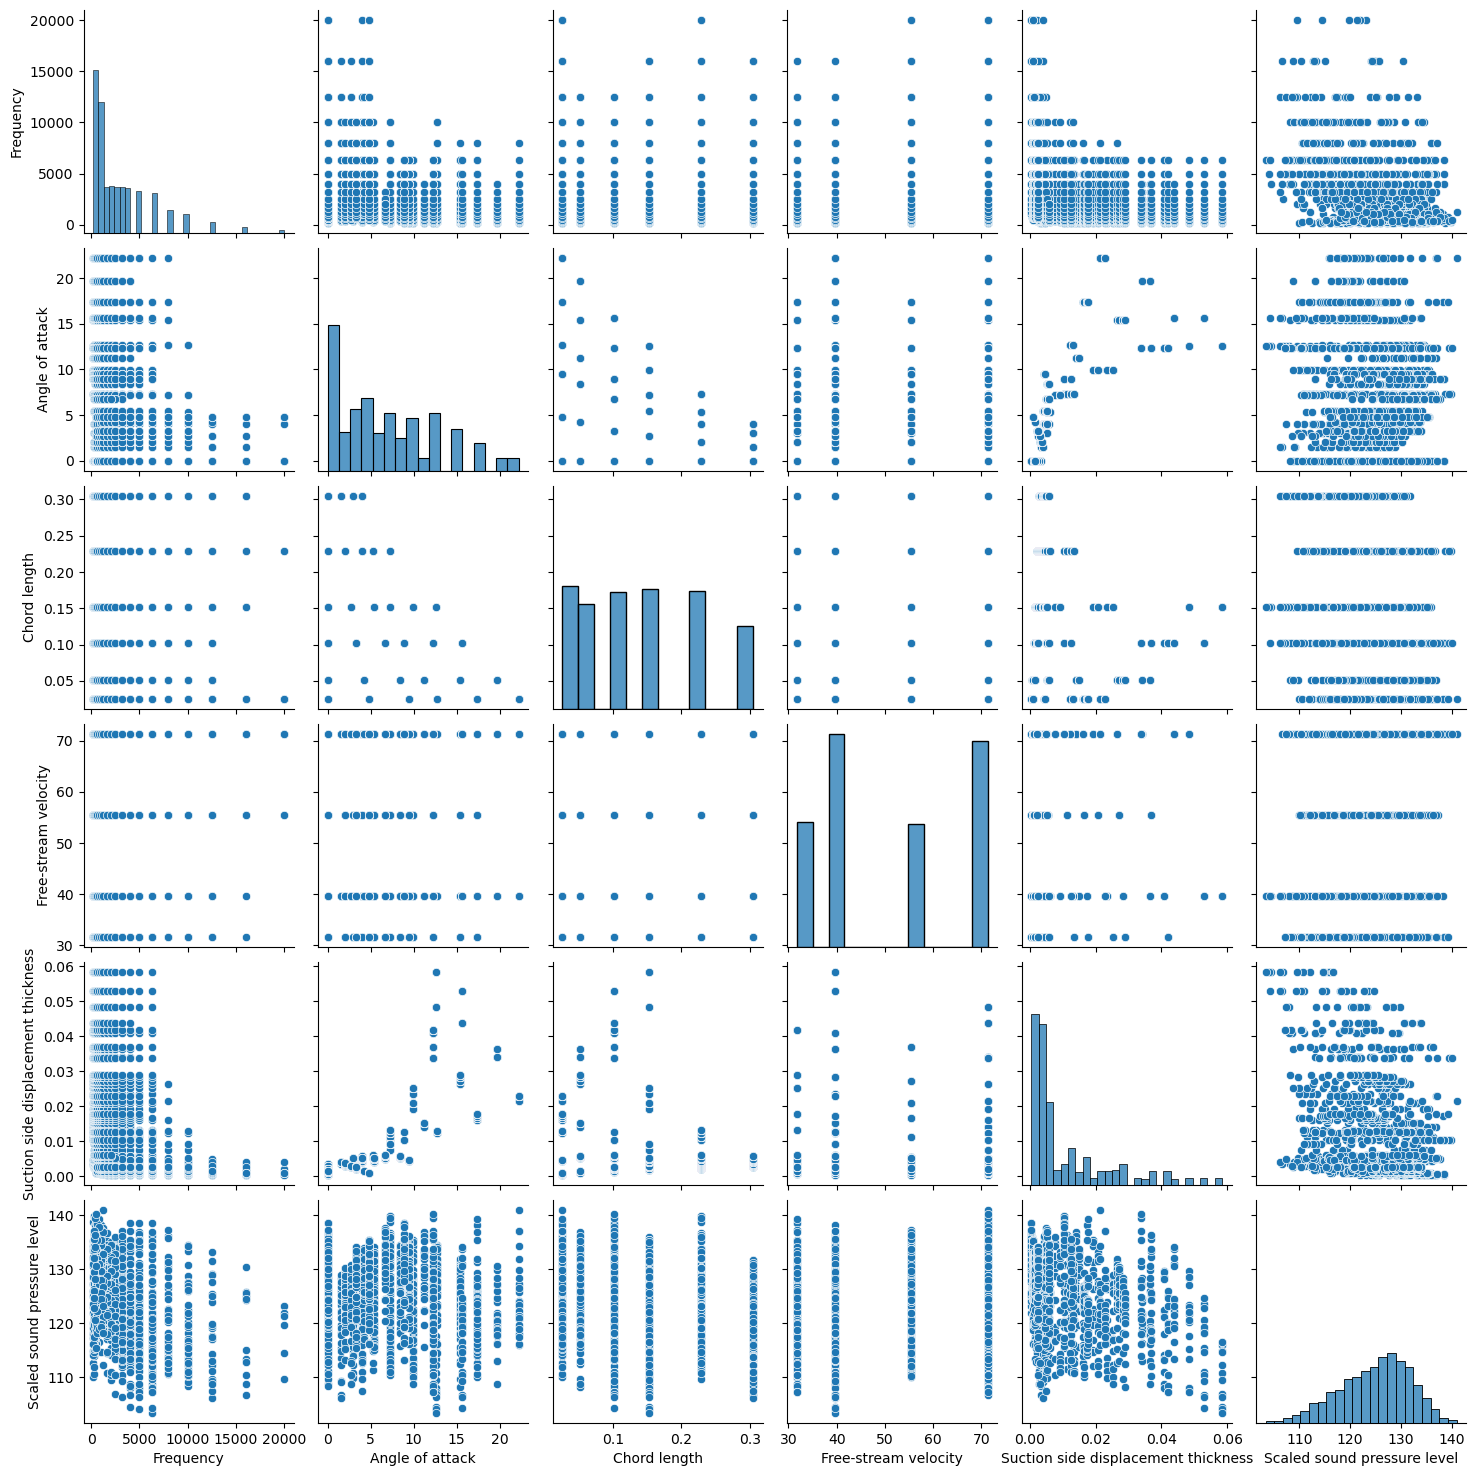

In [10]:
sns.pairplot(data)

In [11]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
print(x)
print(y)

      Frequency  Angle of attack  Chord length  Free-stream velocity  \
0           800              0.0        0.3048                  71.3   
1          1000              0.0        0.3048                  71.3   
2          1250              0.0        0.3048                  71.3   
3          1600              0.0        0.3048                  71.3   
4          2000              0.0        0.3048                  71.3   
...         ...              ...           ...                   ...   
1498       2500             15.6        0.1016                  39.6   
1499       3150             15.6        0.1016                  39.6   
1500       4000             15.6        0.1016                  39.6   
1501       5000             15.6        0.1016                  39.6   
1502       6300             15.6        0.1016                  39.6   

      Suction side displacement thickness  
0                                0.002663  
1                                0.002663  
2  

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [14]:
x_train.corr()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness
Frequency,1.000000,-0.274765,-0.000919,0.124310,-0.238811
Angle of attack,-0.274765,1.000000,-0.500583,0.051093,0.761265
Chord length,-0.000919,-0.500583,1.000000,0.009959,-0.224177
Free-stream velocity,0.124310,0.051093,0.009959,1.000000,-0.009185
Suction side displacement thickness,-0.238811,0.761265,-0.224177,-0.009185,1.000000


<Axes: >

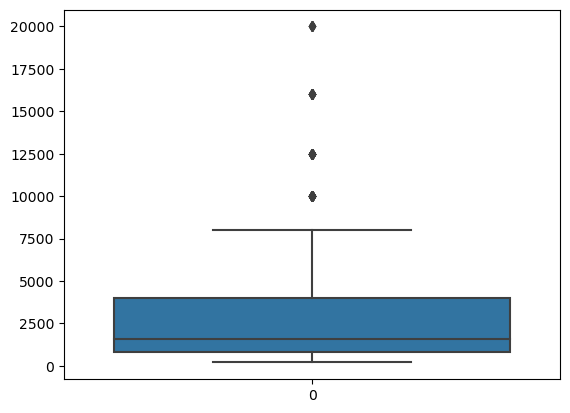

In [15]:
sns.boxplot(x_train['Frequency'])

<Axes: ylabel='Frequency'>

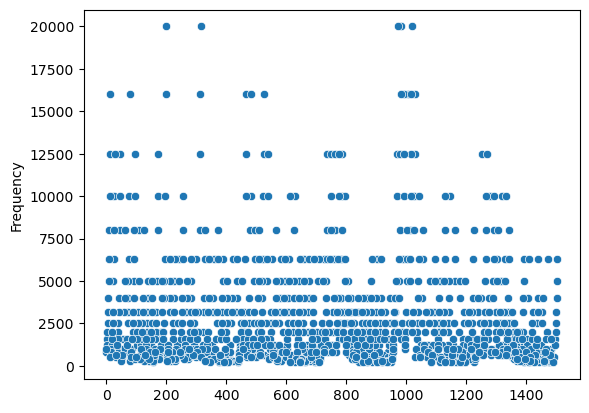

In [16]:
sns.scatterplot(x_train['Frequency'])

In [17]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [18]:
import pickle
pickle.dump(regressor,open('model.pkl','wb'))

In [19]:
!pip install flask

In [21]:
pickled_model=pickle.load(open('model.pkl','rb'))
# Batch I/P
pickled_model.predict(x_test)

array([124.06649005, 119.46413909, 120.33254103, 129.60886761,
       129.78612472, 132.64423416, 122.4349038 , 126.74983006,
       130.01045658, 125.98273694, 132.48873564, 113.83051731,
       130.13817923, 132.56057082, 123.65534464, 113.99243741,
       124.34984419, 126.70187871, 129.23000637, 131.83506582,
       125.76768033, 125.00648272, 116.41914989, 129.86629416,
       124.21067831, 124.67311231, 131.6322296 , 124.6043593 ,
       115.64678565, 123.26378128, 125.22302256, 123.89962071,
       125.51202054, 118.6912124 , 121.72209401, 130.96423273,
       131.37300187, 128.30505685, 121.40529584, 117.87341962,
       126.42152289, 128.89466472, 126.40892509, 123.45296426,
       123.11311866, 130.1672403 , 125.09652956, 120.00622727,
       123.17401814, 132.83265792, 128.71305692, 117.79809953,
       123.48169003, 122.52751265, 126.70612854, 120.54580229,
       123.29728962, 128.69414033, 124.25737638, 123.24008395,
       125.43355297, 131.05870029, 126.77173379, 131.40

In [22]:
x_test.iloc[51]

Frequency                              8000.000000
Angle of attack                           1.500000
Chord length                              0.304800
Free-stream velocity                     71.300000
Suction side displacement thickness       0.003367
Name: 76, dtype: float64

In [23]:
dict_test={
    "Frequency":9,
    "Angle of attack":2,
    "Chord length":1,
    "Free-stream velocity":68,
    "Suction side displacement thickness":1
    
}

In [24]:
dict_test

{'Frequency': 9,
 'Angle of attack': 2,
 'Chord length': 1,
 'Free-stream velocity': 68,
 'Suction side displacement thickness': 1}

In [27]:
list(dict_test.values())

[9, 2, 1, 68, 1]

In [28]:
dict_test.keys()

dict_keys(['Frequency', 'Angle of attack', 'Chord length', 'Free-stream velocity', 'Suction side displacement thickness'])

In [29]:
pickled_model.predict([[9, 2, 1, 68, 1]])[0]

/Users/siddanthapusandeep/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-53.283448263916796